# Module 2: Text into Data: Importing a Text

* DS 5001: Exploratory Text Analytics
* Raf Alvarado

# Set Up

In [1]:
! wget --no-clobber https://www.gutenberg.org/cache/epub/105/pg105.txt
epub_file = "pg105.txt"
csv_file = 'austen-persuasion.csv'

File ‘pg105.txt’ already there; not retrieving.



In [2]:
OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num']

In [3]:
import pandas as pd
%matplotlib inline

# Import file into a dataframe

In [4]:
epub = open(epub_file, 'r', encoding='utf-8-sig').readlines()
df = pd.DataFrame(epub, columns=['line_str'])
df.index.name = 'line_num'
df.line_str = df.line_str.str.strip()

In [5]:
df.sample(10)

,line_str
line_num,
2729,"she loves the Admiral, I would always be with ..."
4770,being dissolved.
2517,"good as he could afford, and should give Charl..."
6903,could have been worse. She had a great deal to...
2235,“I might not like them the better for that per...
8287,"son-in-law’s rights would have given. But, tho..."
703,Monkford. Bless me! what was his name? At this...
764,explanation. An admiral speaks his own consequ...
8029,"“I found,” said he, “that I was considered by ..."


# Extract title of work from first line

In [6]:
df.head(100)

,line_str
line_num,
0,The Project Gutenberg eBook of Persuasion
1,
2,This ebook is for the use of anyone anywhere i...
3,most other parts of the world at no cost and w...
4,"whatsoever. You may copy it, give it away or r..."
...,...
95,to them he must have owed a wife of very super...
96,thing deserved by his own. Lady Elliot had bee...
97,sensible and amiable; whose judgement and cond...


In [7]:
type(df.loc[0].line_str)
import re
print(df.loc[0].line_str)

The Project Gutenberg eBook of Persuasion


In [8]:
title = re.sub(r'The Project Gutenberg [eE]Book of ', '', df.loc[0].line_str)
print(type(title))
print(title)
df['title'] = title
title

<class 'str'>
Persuasion


'Persuasion'

In [9]:
df.head()

,line_str,title
line_num,,
0,The Project Gutenberg eBook of Persuasion,Persuasion
1,,Persuasion
2,This ebook is for the use of anyone anywhere i...,Persuasion
3,most other parts of the world at no cost and w...,Persuasion
4,"whatsoever. You may copy it, give it away or r...",Persuasion


# Remove Gutenberg's front and back matter

In [10]:
a = df.line_str.str.match(r"\*\*\*\s*START OF (THE|THIS) PROJECT")
b = df.line_str.str.match(r"\*\*\*\s*END OF (THE|THIS) PROJECT")

In [11]:
an = df.loc[a].index[0]
bn = df.loc[b].index[0]

In [12]:
df = df.loc[an + 1 : bn - 2]

In [13]:
df

,line_str,title
line_num,,
24,,Persuasion
25,Persuasion,Persuasion
26,,Persuasion
27,,Persuasion
28,by Jane Austen,Persuasion
...,...,...
8353,national importance.,Persuasion
8354,,Persuasion
8355,Finis,Persuasion


# Chunk by chapter

## Find all chapter headers

In [14]:
chap_lines = df.line_str.str.match(r"^\s*(CHAPTER|letter)\s+([IXV]+)", case=False)

In [15]:
chap_lines.head(100)

line_num
24     False
25     False
26     False
27     False
28     False
       ...  
119    False
120    False
121    False
122    False
123    False
Name: line_str, Length: 100, dtype: bool

In [16]:
df.loc[chap_lines]

,line_str,title
line_num,,
40,CHAPTER I.,Persuasion
302,CHAPTER II.,Persuasion
496,CHAPTER III.,Persuasion
783,CHAPTER IV.,Persuasion
957,CHAPTER V.,Persuasion
1294,CHAPTER VI.,Persuasion
1653,CHAPTER VII.,Persuasion
1988,CHAPTER VIII.,Persuasion
2343,CHAPTER IX.,Persuasion


## Assign numbers to chapters

In [17]:
chap_nums = [i+1 for i in range(df.loc[chap_lines].shape[0])]

In [18]:
df.loc[chap_lines, 'chap_num'] = chap_nums

## Forward-fill chapter numbers to following text lines

In [19]:
df.chap_num = df.chap_num.ffill()

## Clean up

In [20]:
df = df.loc[~df.chap_num.isna()] # Remove chapter heading lines
df = df.loc[~chap_lines] # Remove everything before Chapter 1
df.chap_num = df.chap_num.astype('int') # Convert chap_num from float to int

In [21]:
df.sample(10)

,line_str,title,chap_num
line_num,,,
814,"profession, and no connexions to secure even h...",Persuasion,4
5288,dreadful weather we have had! It may not be fe...,Persuasion,18
797,"gradually acquainted, and when acquainted, rap...",Persuasion,4
6162,Wentworth of the navy. His sister married my t...,Persuasion,20
7303,"irritable, misled by every moment’s inadverten...",Persuasion,22
5216,"Mr Elliot was rational, discreet, polished, bu...",Persuasion,17
6286,morning particularly obliged to her for coming...,Persuasion,21
6315,"grandeur, round the orchestra, of course.”",Persuasion,21
6735,"sensible, careful, discerning sort of characte...",Persuasion,21


## Group lines by chapter num 

In [22]:
dfc = df.groupby(OHCO[:1]).line_str.apply(lambda x: '\n'.join(x)).to_frame() # Make big string

In [23]:
dfc.head()

,line_str
chap_num,
1,"\n\nSir Walter Elliot, of Kellynch Hall, in So..."
2,"\n\nMr Shepherd, a civil, cautious lawyer, who..."
3,"\n\n“I must take leave to observe, Sir Walter,..."
4,"\n\n_He_ was not Mr Wentworth, the former cura..."
5,\n\nOn the morning appointed for Admiral and M...


# Split into paragraphs 

In [24]:
dfp = dfc['line_str'].str.split(r'\n\n+', expand=True).stack()\
    .to_frame().rename(columns={0:'para_str'})

In [25]:
dfp.head()

para_str
chap_num                                                     
1        0                                                   
         1  Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                          “ELLIOT OF KELLYNCH HALL.
         3  “Walter Elliot, born March 1, 1760, married, J...
         4  Precisely such had the paragraph originally st...

In [26]:
dfp.index.names = OHCO[:2]

In [27]:
dfp.head()

para_str
chap_num para_num                                                   
1        0                                                          
         1         Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                                 “ELLIOT OF KELLYNCH HALL.
         3         “Walter Elliot, born March 1, 1760, married, J...
         4         Precisely such had the paragraph originally st...

In [28]:
dfp['para_str'] = dfp['para_str'].str.replace(r'\n', ' ').str.strip()
dfp = dfp[~dfp['para_str'].str.match(r'^\s*$')] # Remove empty paragraphs

In [29]:
dfp.head()

para_str
chap_num para_num                                                   
1        1         Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                                 “ELLIOT OF KELLYNCH HALL.
         3         “Walter Elliot, born March 1, 1760, married, J...
         4         Precisely such had the paragraph originally st...
         5         Then followed the history and rise of the anci...

# Split into sentences

NOTE: ADDED `"` to regex in `split()`

In [30]:
dfs = dfp['para_str'].str.split(r'[.?!;:"]+', expand=True).stack()\
    .to_frame().rename(columns={0:'sent_str'})

In [31]:
dfs.index.names = OHCO[:3]

In [32]:
dfs = dfs[~dfs['sent_str'].str.match(r'^\s*$')] # Remove empty paragraphs

In [33]:
dfs.head()

sent_str
chap_num para_num sent_num                                                   
1        1        0         Sir Walter Elliot, of Kellynch Hall, in Somers...
                  1          there\nhe found occupation for an idle hour, ...
                  2          there his faculties were roused into admirati...
                  3          there any\nunwelcome sensations, arising from...
                  4          and there, if every other leaf were powerless...

# Split into tokens

In [34]:
dft = dfs['sent_str'].str.split(r"[\s',-]+", expand=True).stack()\
    .to_frame().rename(columns={0:'token_str'})

In [35]:
dft.index.names = OHCO[:4]

In [36]:
dft.head()

token_str
chap_num para_num sent_num token_num          
1        1        0        0               Sir
                           1            Walter
                           2            Elliot
                           3                of
                           4          Kellynch

# Gathering by Content Object

In [37]:
sents = dft.groupby(OHCO[:3]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})
paras = dft.groupby(OHCO[:2]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})
chaps = dft.groupby(OHCO[:1]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})

In [38]:
def gather(ohco_level):
    return df.groupby(OHCO[:ohco_level]).token_str\
        .apply(lambda x: ' '.join(x))\
        .to_frame()\
        .rename(columns={'token_str':'content'})

In [39]:
sents.sample(10)

,,,content
chap_num,para_num,sent_num,
14,10,4,I am sure you will agree with me
12,50,2,and they had set off immediately informed and...
13,14,3,Anne have you courage to go with me and pay a...
20,51,8,How was such jealousy to be quieted
11,16,1,“These would have been all my friends ” was h...
12,17,13,Oh
17,6,2,Twelve years were gone since they had parted ...
4,1,7,It would be difficult to say which had seen h...
17,25,4,”


<Axes: title={'center': 'Tokens'}, ylabel='Frequency'>

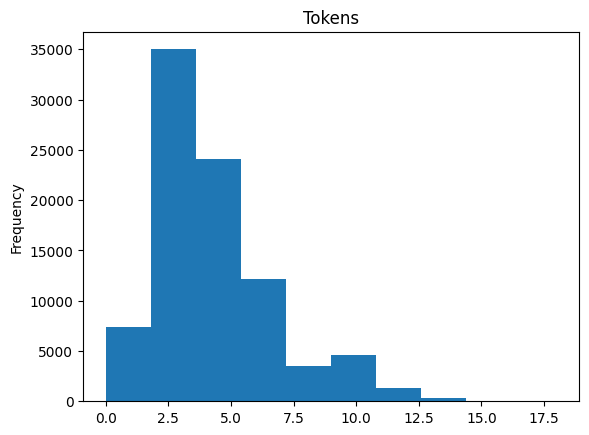

In [40]:
dft.token_str.str.len().plot.hist(bins=10, title="Tokens")

<Axes: title={'center': 'Sentences'}, ylabel='Frequency'>

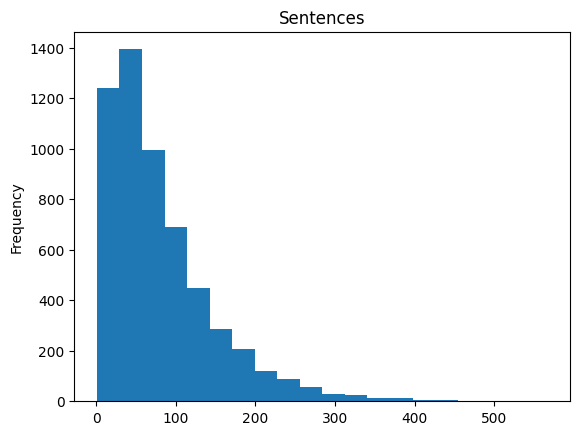

In [41]:
sents.content.str.len().plot.hist(bins=20, title='Sentences')

<Axes: title={'center': 'Paragraphs'}, ylabel='Frequency'>

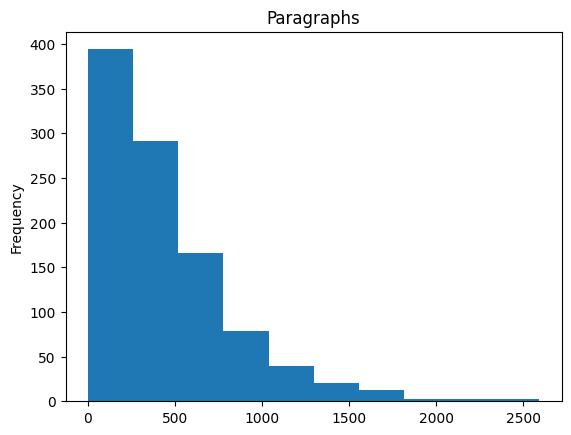

In [42]:
paras.content.str.len().plot.hist(title="Paragraphs")

<Axes: title={'center': 'Chapters'}, ylabel='Frequency'>

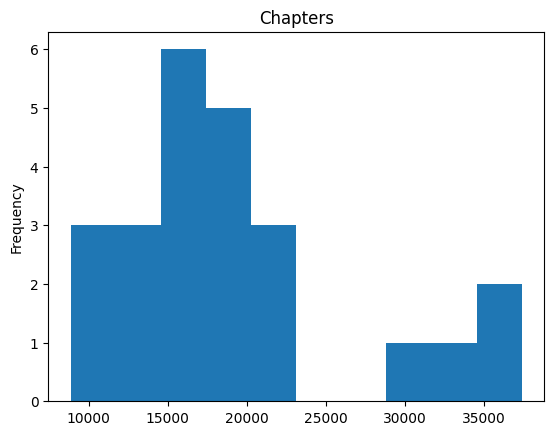

In [43]:
chaps.content.str.len().plot.hist(title="Chapters")

# Save work to CSV

In [44]:
dft.to_csv(csv_file)